# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [10]:
!pip install wbdata #instalo las librerías 
!pip install pandas

ERROR: Invalid requirement: '#instalo': Expected package name at the start of dependency specifier
    #instalo
    ^


In [11]:
import wbdata
import pandas as pd
import datetime

In [12]:
help(wbdata)

Help on package wbdata:

NAME
    wbdata - wbdata: A wrapper for the World Bank API

PACKAGE CONTENTS
    cache
    client
    dates
    fetcher

FUNCTIONS
    get_default_client() -> wbdata.client.Client
        Get the default client

VERSION
    1.0.0

FILE
    c:\users\gustavo\anaconda3\lib\site-packages\wbdata\__init__.py




In [13]:
indicadores = {'NY.GDP.PCAP.CD': 'PIB per cápita (USD corrientes)','SP.DYN.LE00.IN':'Esperanza de vida al nacer (años)'} #elijo indicadores


data = wbdata.get_dataframe(indicadores, country=['BRA','ARG'])

df = pd.DataFrame(data)



In [14]:
df_reset = df.reset_index()

In [15]:
df_reset["date"] = df_reset["date"].astype(int)      #hago esto ya que no me muestra las primeras 10 filas de brasil así que lo configuro por años
df_brasil = df_reset[(df_reset["country"] == "Brazil") & 
                      (df_reset["date"] >= 2014) & 
                      (df_reset["date"] <= 2023)]

In [16]:

print(df.head(10))  # Muestra las primeras 10 filas de argentina ( da la casualidad que justo hay datos en estos años y no NaN lo que permite comparar )
print(df_brasil)   # para que me muestre las de brasil

                PIB per cápita (USD corrientes)  \
country   date                                    
Argentina 2023                     14187.482725   
          2022                     13935.681111   
          2021                     10738.017922   
          2020                      8535.599380   
          2019                      9955.974787   
          2018                     11752.799892   
          2017                     14532.500931   
          2016                     12699.962314   
          2015                     13679.626498   
          2014                     12233.144412   

                Esperanza de vida al nacer (años)  
country   date                                     
Argentina 2023                                NaN  
          2022                             76.064  
          2021                             75.390  
          2020                             75.892  
          2019                             77.284  
          2018         

#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [20]:
print(data.head())  # Ver las primeras filas del DataFrame
print(data.index)   # Ver si los años están en el índice o en una columna

                PIB per cápita (USD corrientes)  \
country   date                                    
Argentina 2023                     14187.482725   
          2022                     13935.681111   
          2021                     10738.017922   
          2020                      8535.599380   
          2019                      9955.974787   

                Esperanza de vida al nacer (años)  
country   date                                     
Argentina 2023                                NaN  
          2022                             76.064  
          2021                             75.390  
          2020                             75.892  
          2019                             77.284  
MultiIndex([('Argentina', '2023'),
            ('Argentina', '2022'),
            ('Argentina', '2021'),
            ('Argentina', '2020'),
            ('Argentina', '2019'),
            ('Argentina', '2018'),
            ('Argentina', '2017'),
            ('Argentina', '2016')

In [38]:
# Asegurar que 'country' y 'date' sean columnas normales
data_filtered = data.reset_index()

In [44]:
# Convertir la columna 'date' a tipo numérico (int)
data["date"] = pd.to_numeric(data["date"], errors="coerce")  # Convierte a número, ignora errores

In [46]:
# Filtrar por Argentina y Brasil entre 2014 y 2023
data_filtered = data[
    (data["country"].isin(["Argentina", "Brazil"])) &  # Solo Arg y Bra
    (data["date"].between(2014, 2023))  # Entre 2014 y 2023
]

In [48]:
# Asegurar que los índices sean columnas normales
data_filtered = data_filtered.reset_index()

In [50]:
# Realizar el análisis estadístico
stats = data_filtered.groupby("country").agg(
    {
        "PIB per cápita (USD corrientes)": ["mean", "median", "std", "min", "max"],
        "Esperanza de vida al nacer (años)": ["mean", "median", "std", "min", "max"]
    }
)

In [52]:
# Mostrar resultados
print(stats)

          PIB per cápita (USD corrientes)                             \
                                     mean        median          std   
country                                                                
Argentina                    12225.078997  12466.553363  1989.923605   
Brazil                        9308.141177   9155.583306  1397.854510   

                                     Esperanza de vida al nacer (años)  \
                   min           max                              mean   
country                                                                  
Argentina  8535.599380  14532.500931                         76.476111   
Brazil     7074.193783  12274.993969                         74.282000   

                                            
           median       std    min     max  
country                                     
Argentina  76.755  0.605264  75.39  77.284  
Brazil     74.332  0.812463  72.75  75.338  


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

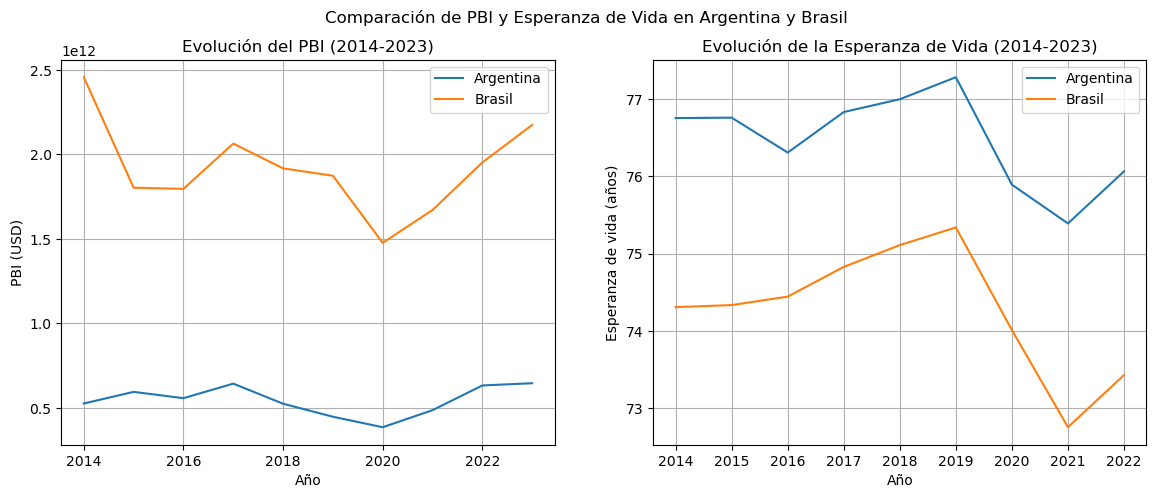

In [54]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt

# Definir países y series de datos
countries = ["ARG", "BRA"]
indicators = {"NY.GDP.MKTP.CD": "GDP", "SP.DYN.LE00.IN": "Life Expectancy"}  # PIB en dólares corrientes y Esperanza de vida

# Definir el rango de años
start_year, end_year = "2014", "2023"

# Obtener datos de World Bank Data
df = wbdata.get_dataframe(indicators, country=countries, date=(start_year, end_year))

# Resetear índice y transformar datos
df = df.reset_index()
df["date"] = df["date"].astype(int)
df = df[(df["date"] >= 2014) & (df["date"] <= 2023)]
df = df.rename(columns={"date": "Año", "country": "Country Name"})

# Pivotear el DataFrame para tener países como columnas
df_pbi = df.pivot(index="Año", columns="Country Name", values="GDP").reset_index()
df_life = df.pivot(index="Año", columns="Country Name", values="Life Expectancy").reset_index()

# Definir ejes para PBI
x1 = df_pbi["Año"]
y1 = df_pbi["Argentina"]

x2 = df_pbi["Año"]
y2 = df_pbi["Brazil"]

# Definir ejes para Esperanza de vida
x3 = df_life["Año"]
y3 = df_life["Argentina"]

x4 = df_life["Año"]
y4 = df_life["Brazil"]

# Graficar múltiples gráficos estilo pyplot
plt.figure(figsize=(14, 5))

# Gráfico del PBI
plt.subplot(121)
plt.plot(x1, y1, label="Argentina")
plt.plot(x2, y2, label="Brasil")
plt.xlabel("Año")
plt.ylabel("PBI (USD)")
plt.title("Evolución del PBI (2014-2023)")
plt.legend()
plt.grid()

# Gráfico de Esperanza de vida
plt.subplot(122)
plt.plot(x3, y3, label="Argentina")
plt.plot(x4, y4, label="Brasil")
plt.xlabel("Año")
plt.ylabel("Esperanza de vida (años)")
plt.title("Evolución de la Esperanza de Vida (2014-2023)")
plt.legend()
plt.grid()

# Título general
plt.suptitle("Comparación de PBI y Esperanza de Vida en Argentina y Brasil")
plt.show(block=True)

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [2]:
!pip install requests beautifulsoup4 pandas openpyxl 
!pip install selenium


   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.4 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.4 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.4 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.4 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.4 MB 1.2 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.4 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.4 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.4/9.4 MB 1.2 MB/s eta 0:00:06
   ----------- ---------------------------- 2.6/9.4 MB 1.2 MB/s eta 0:00:06
   ------------ --------------------------- 2.9/9.4 MB 1.2 MB/s eta 0:00:06
   ------------- ----------------

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import os
from IPython.display import display, Image

# URL del diario La Nación
url = "https://www.lanacion.com.ar/"

# Realizar la solicitud HTTP
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Parsear el contenido HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Buscar los links de las noticias (ajustar la clase según la estructura de la página)
    links = []
    for a in soup.find_all('a', href=True):
        href = a['href']
        if href.startswith("/") and "#" not in href:  # Esto es para evitar enlaces internos irrelevantes
            full_link = url + href.lstrip("/")
            links.append(full_link)
        elif href.startswith("http") and "lanacion.com.ar" in href:
            links.append(href)
    
    # Eliminar duplicados- esto es para que no me muestre los link dos veces.
    links = list(set(links))
    
    # Crear DataFrame con los links
    df = pd.DataFrame({'Links': links})
    
    # Exportar a un archivo Excel
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    excel_filename = f"noticias_lanacion_{timestamp}.xlsx"
    df.to_excel(excel_filename, index=False)
    
    print(f"Se han guardado {len(links)} enlaces en el archivo {excel_filename}.")
    



Se han guardado 239 enlaces en el archivo noticias_lanacion_20250403_145925.xlsx.
